In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/avis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',validation_size=0)

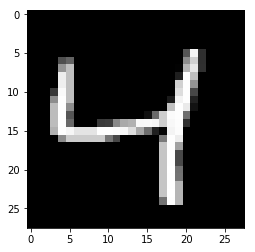

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

In [23]:
encoding_dim = 32
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None,image_size), name= 'inputs')
targets_ = tf.placeholder(tf.float32, (None,image_size), name= 'targets')


encoded = tf.layers.dense(inputs_ , encoding_dim, activation=tf.nn.relu)
logits = tf.layers.dense(encoded, image_size, activation=None)

#========================== encoder pro===========================
encoded2 = tf.layers.dense(logits , encoding_dim, activation=tf.nn.relu)
logits2 = tf.layers.dense(encoded2, image_size, activation=None)

encoded3 = tf.layers.dense(logits2 , encoding_dim, activation=tf.nn.relu)
logits3 = tf.layers.dense(encoded3, image_size, activation=None)


decoded = tf.nn.sigmoid(logits3,name='output')
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_ , logits = logits3)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [24]:
sess = tf.Session()

In [ ]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())

for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost,opt],feed_dict = feed)
        
        print("Epoch: {}/{} ..." . format(e+1,epochs),
             "Training loss: {:.4f}".format(batch_cost))
        

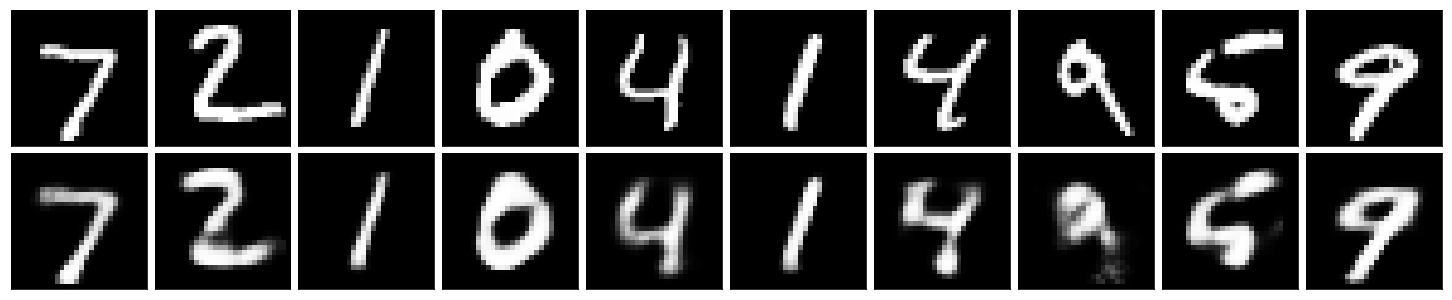

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_:in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)